# Inheritance
> Non-OOP lenguages like **Go** and **Rust** suppor *encapsulation and abstraction*, but `inheritance` is unique to **`class-based`** lenguages like Python and Java
---
Inheritance allows a **`child`** class to *inherit* `properties` and `methods` from a **`parent`** class. It is a way to share code between classes. For example, let's say we create **`Aircraft`** class, which is for any type of air vehicle: 

In [2]:
class Aircraft:
    def __init__(self, height, speed):
        self.height = height
        self.speed = speed

    def fly_up(self):
        self.height += self.speed

Now, if we want to create a **`Helicopter`** we wouldn't create all the properties and method again, like this:

In [3]:
class Helicopter:
    def __init__(self, height, speed):
        self.height = height
        self.speed = speed
        self.direction = 0

    def fly_up(self):
        self.height += self.speed

    def rotate(self):
        self.direction += 90

**Instead**, we can make the **`Helicopter`** class take all the behavior from an **`Aircraft`** class, and then just add its own unique behavior:

In [4]:
class Helicopter(Aircraft):
    def __init__(self, height, speed):
        super().__init__(height, speed)
        self.direction = 0

    def rotate(self):
        self.direction += 90

By adding **`(Aircraft)`** **`Helicopter`** we are saying "*Make Helicopter a child class of Aircraft*", and now, Helicopter has all the properties of the Aircraft
> **`super()`** method returns a proxy of the parent class, meaning we can call the parent's class **`constructor and methods`**

Now, to create a Jet we would use:

In [5]:
class Jet(Aircraft):
    def __init__(self, speed):
        # Jets always start on the ground
        super().__init__(0, speed)

    def go_supersonic(self):
        self.speed *= 2

When we create an object on **`Helicopter`** class, python calls the constructor of  **`Helicopter`**, and because the constructor is `super().__init__(height,speed)`, **`super()`** tells python to look for the `__init__` in the father class, **`Aircraft`**. It executes the `__init__`, and takes the value passed by the creation of the object

---
On the next example, all the `archers` are **humans**, but not all **humans** are `archers`. All humans have a *name*, but only archers have a `__num_arrows` property. So, the `archers` should inherit the **humans** class:

In [8]:
class Human:
    def __init__(self, name):
        self.__name = name

    def get_name(self):
        return self.__name

class Archer(Human):
    def __init__(self, name, num_arrows):
        super().__init__(name)
        self.__num_arrows = num_arrows
        pass

    def get_num_arrows(self):
        return self.__num_arrows
        pass

archer1 = Archer('Eder', 15)
print(archer1.get_num_arrows())
print(archer1.get_name())

15
Eder


In [9]:
#test
run_cases = [
    ("Faramir", "Human", None),
    ("Bard", "Archer", 1),
]

submit_cases = run_cases + [
    ("Boromir", "Human", None),
    ("Aragorn", "Human", None),
    ("Legolas", "Archer", 93828),
]


def test_inheritance():
    print("---------------------------------")
    print("Inheritance Test:")
    if "Archer" not in globals():
        print("Archer class not found")
        return False
    if "Human" not in globals():
        print("Human class not found")
        return False
    if not issubclass(Archer, Human):
        print("Archer is not a child class of Human")
        return False
    print("Archer is a child class of Human")
    return True


def test(name, type, num_arrows):
    print("---------------------------------")
    print(f"Type:   {type}")
    print(f"Name:   {name}")
    if type == "Archer":
        print(f"Arrows: {num_arrows}")
    print("")
    try:
        if type == "Human":
            human = Human(name)
            print(f"Expecting name: {name}")
            print(f"Actual name:    {human.get_name()}")
            if human.get_name() == name:
                return True
            else:
                return False
        else:
            archer = Archer(name, num_arrows)
            print(f"Expecting name:   {name}")
            print(f"Actual name:      {archer.get_name()}")
            print(f"Expecting arrows: {num_arrows}")
            print(f"Actual arrows:    {archer.get_num_arrows()}")
            if archer.get_name() == name and archer.get_num_arrows() == num_arrows:
                return True
            else:
                return False
    except Exception as e:
        print(f"Error: {e}")
        return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    correct = test_inheritance()
    if correct:
        print("Pass")
        passed += 1
    else:
        print("Fail")
        failed += 1
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            print("Pass")
            passed += 1
        else:
            print("Fail")
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Inheritance Test:
Archer is a child class of Human
Pass
---------------------------------
Type:   Human
Name:   Faramir

Expecting name: Faramir
Actual name:    Faramir
Pass
---------------------------------
Type:   Archer
Name:   Bard
Arrows: 1

Expecting name:   Bard
Actual name:      Bard
Expecting arrows: 1
Actual arrows:    1
Pass
---------------------------------
Type:   Human
Name:   Boromir

Expecting name: Boromir
Actual name:    Boromir
Pass
---------------------------------
Type:   Human
Name:   Aragorn

Expecting name: Aragorn
Actual name:    Aragorn
Pass
---------------------------------
Type:   Archer
Name:   Legolas
Arrows: 93828

Expecting name:   Legolas
Actual name:      Legolas
Expecting arrows: 93828
Actual arrows:    93828
Pass
============= PASS ==============
6 passed, 0 failed


### Inheritance should be use only when **`A`** is always **`B`**
For example:
> **Cat** should inherit from **Animal** because a cat is always an animal
> **Truck** should inherit from **Vehicle** because a track is always a vehicle

> **Animal** should not inherit from **cat** because an animal is not always a cat
> **Human** should not inherit from **Employed** because a human is not always employed

--- 
When a **child** class inherits from a **parent**, it inherits *everything*. If you only want to share some functionality, inheritance should not be the tool to use, or you can create a new parent class that both classes inherit from

> ## A good **child** class is a **`subset`** of its **parent** class

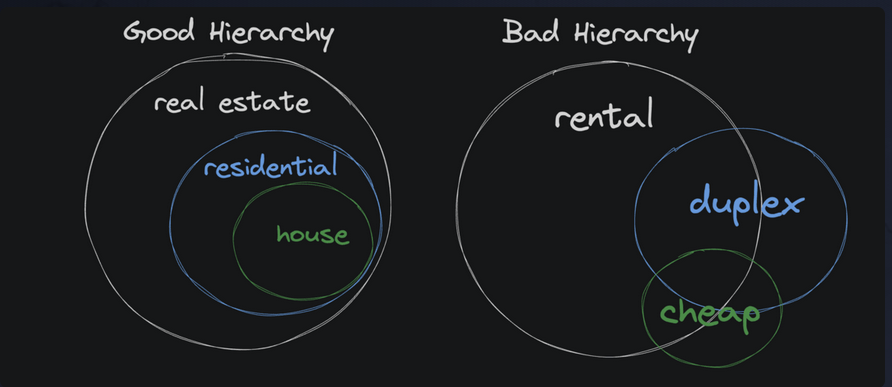
---
In the following example, I will create a new unit: `Crossbowman`. A *crossbowman* is always an *archer*, but not all **archers** are **crossbowmen**. Crossbowmen have several arrows, but with an additional method: **triple_shot()**:

In [30]:
class Human:
    def __init__(self, name):
        self.__name = name

    def get_name(self):
        return self.__name

class Archer(Human):
    def __init__(self, name, num_arrows):
        super().__init__(name)
        self.__num_arrows = num_arrows

    def get_num_arrows(self):
        return self.__num_arrows

    def use_arrows(self, num):
        if num > self.__num_arrows:
            raise ValueError("not enough arrows")
        self.__num_arrows -= num
        return self.__num_arrows
        pass


class Crossbowman(Archer):
    def __init__(self, name, num_arrows):
        super().__init__(name, num_arrows)
        pass

    def triple_shot(self, target):
        self.use_arrows(3)
        return f'{target.get_name()} was shot by 3 crossbow bolts'
        pass
#Checking
cross = Crossbowman('Eder', 10)
print(cross.get_name())
print(cross.use_arrows(5))
archer = Archer('Jeff', 8)
print(cross.triple_shot(archer))

Eder
5
Jeff was shot by 3 crossbow bolts


In [28]:
run_cases = [
    ("Will", 1, "Darren", 4, None, 1),
    ("Elena", 5, "Connor", 3, None, 0),
]

submit_cases = run_cases + [
    ("Jake", 0, "Victor", 3, None, 0),
    ("Ryan", 2, "Emma", 1, "not enough arrows", None),
    ("Zoe", 10, "Lucas", 8, None, 5),
]


def test(
    archer_name,
    archer_arrows,
    crossbowman_name,
    crossbowman_bolts,
    expected_exception,
    expected_remaining_bolts,
):
    print("---------------------------------")
    print(f"Archer: {archer_name}, Arrows: {archer_arrows}")
    archer = Archer(archer_name, archer_arrows)
    print(f"Crossbowman: {crossbowman_name}, Arrows: {crossbowman_bolts}")
    print("")
    crossbowman = Crossbowman(crossbowman_name, crossbowman_bolts)
    try:
        expected_str = f"{archer_name} was shot by 3 crossbow bolts"
        actual_str = crossbowman.triple_shot(archer)
        if expected_exception:
            print(
                f"Expected exception '{expected_exception}', but no exception occurred"
            )
            return False
        print(f"Expected triple_shot message: {expected_str}")
        print(f"Actual triple_shot message:   {actual_str}")
        if actual_str != expected_str:
            return False

        print(f"Expected remaining bolts: {expected_remaining_bolts}")
        print(f"Actual remaining bolts:   {crossbowman.get_num_arrows()}")
        if crossbowman.get_num_arrows() != expected_remaining_bolts:
            return False
        return True
    except Exception as e:
        if str(e) == expected_exception:
            print(f"Expected exception: {expected_exception}")
            print(f"Actual exception:   {e}")
            return True
        else:
            print(f"Unexpected exception: {e}")
            return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            print("Pass")
            passed += 1
        else:
            print("Fail")
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Archer: Will, Arrows: 1
Crossbowman: Darren, Arrows: 4

Expected triple_shot message: Will was shot by 3 crossbow bolts
Actual triple_shot message:   Will was shot by 3 crossbow bolts
Expected remaining bolts: 1
Actual remaining bolts:   1
Pass
---------------------------------
Archer: Elena, Arrows: 5
Crossbowman: Connor, Arrows: 3

Expected triple_shot message: Elena was shot by 3 crossbow bolts
Actual triple_shot message:   Elena was shot by 3 crossbow bolts
Expected remaining bolts: 0
Actual remaining bolts:   0
Pass
---------------------------------
Archer: Jake, Arrows: 0
Crossbowman: Victor, Arrows: 3

Expected triple_shot message: Jake was shot by 3 crossbow bolts
Actual triple_shot message:   Jake was shot by 3 crossbow bolts
Expected remaining bolts: 0
Actual remaining bolts:   0
Pass
---------------------------------
Archer: Ryan, Arrows: 2
Crossbowman: Emma, Arrows: 1

Expected exception: not enough arrows
Actual exception:   not enough arr

# Multiple children
Usually, inheritance hierarchies form **`trees`**, not **lines**. A parent can have multiple children:
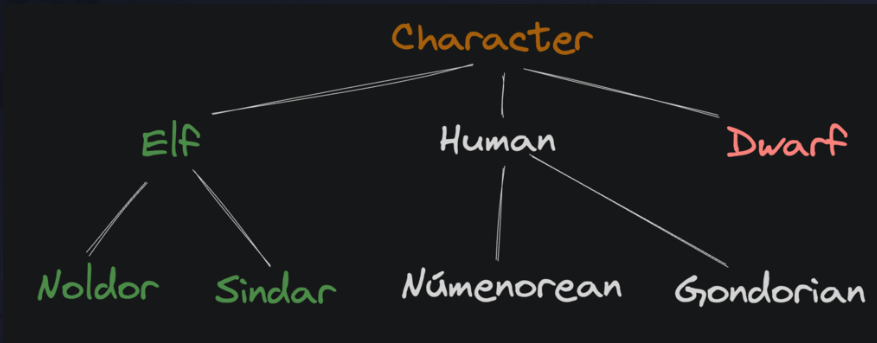

### It is more often to a class to have multiple children, than be very deep. **Wide, not deep** 
---
---
In the next example, I will create two child classes to a parent, with different characteristics:

In [37]:
class Hero:
    def __init__(self, name, health):
        self.__name = name
        self.__health = health

    def get_name(self):
        return self.__name

    def get_health(self):
        return self.__health

    def take_damage(self, damage):
        self.__health -= damage

class Archer(Hero):
    def __init__(self, name, health, num_arrows):
        super().__init__(name, health)
        self.__num_arrows = num_arrows
        pass

    def shoot(self, target):
        if self.__num_arrows <= 0:
            raise ValueError('not enough arrows')
        self.__num_arrows -= 1
        target.take_damage(10)
        return self.__num_arrows
        pass
class Wizard(Hero):
    def __init__(self, name, health, mana):
        super().__init__(name, health)
        self.__mana = mana
        pass

    def cast(self, target):
        if self.__mana < 25:
            raise Exception('not enough mana')
        self.__mana -= 25
        target.take_damage(25)
        pass

archer = Archer('Eder', 100, 10)
hero = Hero('Will', 100)
wizard = Wizard('Jane', 100, 50)
print(hero.get_health())
archer.shoot(hero)
print(hero.get_health())
wizard.cast(hero)
print(hero.get_health())
wizard.cast(hero)

100
90
65


In [38]:
run_cases = [
    (
        Wizard("Ron", 50, 90),
        Archer("Odysseus", 80, 2),
        ["shoot", "shoot", "shoot", "cast"],
        [None, None],
        "not enough arrows",
    ),
    (
        Wizard("Harry", 30, 70),
        Archer("Pericles", 100, 3),
        ["cast", "shoot", "shoot"],
        [10, 75],
    ),
]

submit_cases = run_cases + [
    (
        Wizard("Luna", 65, 49),
        Archer("Paris", 85, 2),
        ["cast", "shoot", "shoot", "cast"],
        [None, None],
        "not enough mana",
    ),
    (
        Wizard("Neville", 55, 45),
        Archer("Hector", 75, 3),
        ["shoot", "cast"],
        [45, 50],
    ),
]


def test(wizard, archer, actions, expected_result, expected_err=None):
    print("---------------------------------")
    print(f"Inputs:")
    print(f" * Wizard: {wizard.get_name()}, HP: {wizard.get_health()}")
    print(f" * Archer: {archer.get_name()}, HP: {archer.get_health()}")
    print(f"Actions: {actions}")
    print("")

    try:
        for action in actions:
            if action == "cast":
                print(f"{wizard.get_name()} casts a spell at {archer.get_name()}")
                wizard.cast(archer)
            elif action == "shoot":
                print(f"{archer.get_name()} shoots an arrow at {wizard.get_name()}")
                archer.shoot(wizard)
        print("")

        if expected_err:
            print(f"Expected Exception: {expected_err}")
            print("Actual Exception:    None")
            return False

        wizard_hp = wizard.get_health()
        archer_hp = archer.get_health()
        print(f"Expected Wizard HP: {expected_result[0]}")
        print(f"Actual Wizard HP:   {wizard_hp}")
        print(f"Expected Archer HP: {expected_result[1]}")
        print(f"Actual Archer HP:   {archer_hp}")

        if wizard_hp == expected_result[0] and archer_hp == expected_result[1]:
            return True
        else:
            return False

    except Exception as e:
        print(f"Expected Exception: {expected_err}")
        print(f"Actual Exception:   {str(e)}")
        if str(e) == expected_err:
            return True
        else:
            return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            print("Pass")
            passed += 1
        else:
            print("Fail")
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Inputs:
 * Wizard: Ron, HP: 50
 * Archer: Odysseus, HP: 80
Actions: ['shoot', 'shoot', 'shoot', 'cast']

Odysseus shoots an arrow at Ron
Odysseus shoots an arrow at Ron
Odysseus shoots an arrow at Ron
Expected Exception: not enough arrows
Actual Exception:   not enough arrows
Pass
---------------------------------
Inputs:
 * Wizard: Harry, HP: 30
 * Archer: Pericles, HP: 100
Actions: ['cast', 'shoot', 'shoot']

Harry casts a spell at Pericles
Pericles shoots an arrow at Harry
Pericles shoots an arrow at Harry

Expected Wizard HP: 10
Actual Wizard HP:   10
Expected Archer HP: 75
Actual Archer HP:   75
Pass
---------------------------------
Inputs:
 * Wizard: Luna, HP: 65
 * Archer: Paris, HP: 85
Actions: ['cast', 'shoot', 'shoot', 'cast']

Luna casts a spell at Paris
Paris shoots an arrow at Luna
Paris shoots an arrow at Luna
Luna casts a spell at Paris
Expected Exception: not enough mana
Actual Exception:   not enough mana
Pass
------------------------

# Dragons
In the game, there are orcs, humans, goblins, dragons, etc. All of them are called "units". The only thing specific to a unit is that it has a `position` on the game, talking about a Cartesian plane, and a `name`. **Dragons** are a special type of unit, because they can breathe fire in a large area, dealing damage to any units touched:
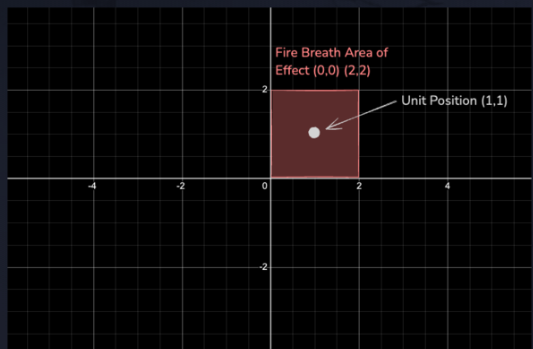
The example uses a `__fire_range` of `1` centered at `(1,1)`

---
 ## Dragon breathing fire:

In [1]:
class Unit:
    def __init__(self, name, pos_x, pos_y):
        self.name = name
        self.pos_x = pos_x
        self.pos_y = pos_y

    def in_area(self, x_1, y_1, x_2, y_2):
        #This method accepts 'area' represented by four points
        #where (x_1,y_1) represents the bottom-left corner and (x_2,y_2) the top right
        return (self.pos_x >= x_1 and self.pos_x <= x_2 and self.pos_y >= y_1 and self.pos_y <= y_2)
        pass

class Dragon(Unit):
    def __init__(self, name, pos_x, pos_y, fire_range):
        super().__init__(name, pos_x, pos_y)
        self.__fire_range = fire_range

    def breathe_fire(self, x, y, units):
        affected_units = []
        for unit in units:
            in_area = unit.in_area(x-self.__fire_range, y-self.__fire_range,x+self.__fire_range,y+self.__fire_range)
            if in_area == True:
                affected_units.append(unit.name)
        return affected_units
        pass
Yvor = Unit("Yvor", 1, 0)
Nicholas = Unit("Nicholas", 0, 1)
Eoin = Unit("Eoin", 2, 0)
Cian = Unit("Cian", 3, 3)
Andrew = Unit("Andrew", -1, 4)
Baran = Unit("Baran", -6, 5)
Carbry = Unit("Carbry", 2, 1)

dragon = Dragon("Smaug", 6, 6, 10)
print(f"{dragon.name} breathes fire at {dragon.pos_x}, {dragon.pos_y}")
hit_units = dragon.breathe_fire(6,6,[Yvor, Nicholas, Eoin, Cian, Andrew, Baran, Carbry])
print(f'Hitted units: {hit_units}')

Smaug breathes fire at 6, 6
Hitted units: ['Yvor', 'Nicholas', 'Eoin', 'Cian', 'Andrew', 'Carbry']


# Examples 

## Dragon battle

In [86]:
def main():
    dragons = [
        Dragon("Green Dragon", 0, 0, 1),
        Dragon("Red Dragon", 2, 2, 2),
        Dragon("Blue Dragon", 4, 3, 3),
        Dragon("Black Dragon", 5, -1, 4),
    ]

    # Describing each dragon in order
    for dragon in dragons:
        describe(dragon)
    
    #Iterating over all dragons and having each dragon a breathe_fire at (3,3)
    #And excluding each dragon from the list of hited
    current_position = 0
    for dragon in dragons:
        list_without_current_dragon = dragons.copy()
        del list_without_current_dragon[current_position]
        current_position += 1
        dragon.breathe_fire(3,3, list_without_current_dragon)

def describe(dragon):
    print(f"{dragon.name} is at {dragon.pos_x}/{dragon.pos_y}")


class Unit:
    def __init__(self, name, pos_x, pos_y):
        self.name = name
        self.pos_x = pos_x
        self.pos_y = pos_y

    def in_area(self, x_1, y_1, x_2, y_2):
        return (
            self.pos_x >= x_1
            and self.pos_x <= x_2
            and self.pos_y >= y_1
            and self.pos_y <= y_2
        )


class Dragon(Unit):
    def __init__(self, name, pos_x, pos_y, fire_range):
        super().__init__(name, pos_x, pos_y)
        self.__fire_range = fire_range

    def breathe_fire(self, x, y, units):
        print("====================================")
        print(f"{self.name} breathes fire at {x}/{y} with range {self.__fire_range}")
        print("------------------------------------")
        for unit in units:
            in_area = unit.in_area(
                x - self.__fire_range,
                y - self.__fire_range,
                x + self.__fire_range,
                y + self.__fire_range,
            )
            if in_area:
                print(f"{unit.name} is hit by the fire")

main()

Green Dragon is at 0/0
Red Dragon is at 2/2
Blue Dragon is at 4/3
Black Dragon is at 5/-1
Green Dragon breathes fire at 3/3 with range 1
------------------------------------
Red Dragon is hit by the fire
Blue Dragon is hit by the fire
Red Dragon breathes fire at 3/3 with range 2
------------------------------------
Blue Dragon is hit by the fire
Blue Dragon breathes fire at 3/3 with range 3
------------------------------------
Green Dragon is hit by the fire
Red Dragon is hit by the fire
Black Dragon breathes fire at 3/3 with range 4
------------------------------------
Green Dragon is hit by the fire
Red Dragon is hit by the fire
Blue Dragon is hit by the fire


## Siege, BattertingRam and Catapult Units 

In [23]:
class Siege:
    def __init__(self, max_speed, efficiency):
        self.max_speed = max_speed
        self.efficiency = efficiency
        pass

    def get_trip_cost(self, distance, food_price):
        #Calculates the cost of a trip
        cost_of_trip = distance / self.efficiency * food_price
        return cost_of_trip
        pass

    def get_cargo_volume(self):
        #This method will be override by the children
        pass


class BatteringRam(Siege):
    def __init__(
        self,
        max_speed,
        efficiency,
        load_weight,
        bed_area,
    ):
        super().__init__(max_speed,efficiency)
        self.__load_weight = load_weight
        self.__bed_area = bed_area
        pass

    def get_trip_cost(self, distance, food_price):
        cost_of_trip = super().get_trip_cost(distance,food_price) + self.__load_weight*0.01
        return cost_of_trip
        pass
    
    def get_cargo_volume(self):
        cargo_capacity = self.__bed_area*2
        return cargo_capacity
        pass


class Catapult(Siege):
    def __init__(self, max_speed, efficiency, cargo_volume):
        super().__init__(max_speed, efficiency)
        self.__cargo_volume = cargo_volume
        pass

    #get_trip_cost() is inherited from the parent
    
    def get_cargo_volume(self):
        return self.__cargo_volume
        pass

In [22]:
run_cases = [
    (Siege(100, 10), 100, 4, 40, None),
    (BatteringRam(100, 10, 2000, 5), 100, 5, 70, 10),
    (Catapult(100, 10, 2), 100, 6, 60, 2),
]

submit_cases = run_cases + [
    (Siege(60, 5), 100, 2, 40, None),
    (BatteringRam(80, 5, 2000, 4), 100, 4, 100, 8),
    (Catapult(90, 4, 3), 100, 10, 250, 3),
]


def test(vehicle, distance, fuel_price, expected_cost, expected_cargo_volume):
    try:
        vehicle_type = vehicle.__class__.__name__
        actual_cost = int(vehicle.get_trip_cost(distance, fuel_price))
        actual_cargo_volume = vehicle.get_cargo_volume()
        if actual_cargo_volume is not None:
            actual_cargo_volume = int(actual_cargo_volume)
        print("---------------------------------")
        print(f"Testing {vehicle_type}")
        print(f" * Max Speed:  {vehicle.max_speed} kph")
        print(f" * Efficiency: {vehicle.efficiency} km/food")
        print(f"Expected Cargo Volume: {expected_cargo_volume}")
        print(f"Actual Cargo Volume:   {actual_cargo_volume}")
        print("")
        print(f"Inputs:")
        print(f" * Distance: {distance} km")
        print(f" * Price: {fuel_price} per food")
        print(f"Expected Trip Cost: {expected_cost} ")
        print(f"Actual Trip Cost:   {actual_cost}")
        if (
            actual_cost == expected_cost
            and expected_cargo_volume == actual_cargo_volume
        ):
            print("Pass")
            return True
        else:
            print("Fail")
            return False
    except Exception as e:
        print(f"Error: {e}")
        print("Fail")
        return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Testing Siege
 * Max Speed:  100 kph
 * Efficiency: 10 km/food
Expected Cargo Volume: None
Actual Cargo Volume:   None

Inputs:
 * Distance: 100 km
 * Price: 4 per food
Expected Trip Cost: 40 
Actual Trip Cost:   40
Pass
---------------------------------
Testing BatteringRam
 * Max Speed:  100 kph
 * Efficiency: 10 km/food
Expected Cargo Volume: 10
Actual Cargo Volume:   10

Inputs:
 * Distance: 100 km
 * Price: 5 per food
Expected Trip Cost: 70 
Actual Trip Cost:   70
Pass
---------------------------------
Testing Catapult
 * Max Speed:  100 kph
 * Efficiency: 10 km/food
Expected Cargo Volume: 2
Actual Cargo Volume:   2

Inputs:
 * Distance: 100 km
 * Price: 6 per food
Expected Trip Cost: 60 
Actual Trip Cost:   60
Pass
---------------------------------
Testing Siege
 * Max Speed:  60 kph
 * Efficiency: 5 km/food
Expected Cargo Volume: None
Actual Cargo Volume:   None

Inputs:
 * Distance: 100 km
 * Price: 2 per food
Expected Trip Cost: 40 
Actual Tri

In [1]:
#Squares and rectangles
#All squares are rectangles, but not all rectangles are squares
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width
        pass

    def get_area(self):
        area = self.length * self.width
        return area
        pass

    def get_perimeter(self):
        perimeter = 2*self.length + 2*self.width
        return perimeter
        pass


class Square(Rectangle):
    def __init__(self, side):
        super().__init__(side, side)
        pass

shape = Square(5)
shape.get_area()


25

In [110]:
run_cases = [
    ((2, 4), 8, 12),
    ((5,), 25, 20),
]

submit_cases = run_cases + [
    ((1, 1), 1, 4),
    ((3, 4), 12, 14),
    ((6, 7), 42, 26),
    ((8,), 64, 32),
    ((9, 10), 90, 38),
]


def test(inputs, expected_area, expected_perimeter):
    print("---------------------------------")
    if len(inputs) == 2:  # Rectangle
        shape = Rectangle(*inputs)
        shape_type = "Rectangle"
    else:  # Square
        shape = Square(inputs[0])
        shape_type = "Square"

    print(f"Testing {shape_type} with inputs {inputs}")
    area = shape.get_area()
    perimeter = shape.get_perimeter()
    print(f"Expected area: {expected_area}")
    print(f"Actual area:   {area}")
    print(f"Expected perimeter: {expected_perimeter}")
    print(f"Actual perimeter:   {perimeter}")

    if area != expected_area or perimeter != expected_perimeter:
        print("Fail")
        return False
    else:
        print("Pass")
        return True


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Testing Rectangle with inputs (2, 4)
Expected area: 8
Actual area:   8
Expected perimeter: 12
Actual perimeter:   12
Pass
---------------------------------
Testing Square with inputs (5,)
Expected area: 25
Actual area:   25
Expected perimeter: 20
Actual perimeter:   20
Pass
---------------------------------
Testing Rectangle with inputs (1, 1)
Expected area: 1
Actual area:   1
Expected perimeter: 4
Actual perimeter:   4
Pass
---------------------------------
Testing Rectangle with inputs (3, 4)
Expected area: 12
Actual area:   12
Expected perimeter: 14
Actual perimeter:   14
Pass
---------------------------------
Testing Rectangle with inputs (6, 7)
Expected area: 42
Actual area:   42
Expected perimeter: 26
Actual perimeter:   26
Pass
---------------------------------
Testing Square with inputs (8,)
Expected area: 64
Actual area:   64
Expected perimeter: 32
Actual perimeter:   32
Pass
---------------------------------
Testing Rectangle with inputs (9, 

In [ ]:
#buildings
class RealEstate:
    def __init__(self, location):
        self.__location = location


class Residential(RealEstate):
    def __init__(self, location, bedrooms):
        super().__init__(location)
        self.__bedrooms = bedrooms


class House(Residential):
    def __init__(self, location, bedrooms, yard_size):
        super().__init__(location, bedrooms)
        self.__yard_size = yard_size